# Data Acquisition

In this notebook we will download and prepare all data in just one file, so it is easier to work with the thousands that are to be treated.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

We will store the paths to each file in a dataframe, where we will have access to the source, the path and file, the emotion (the target) and some targets.

In [2]:
audios = pd.DataFrame(data=[], columns=['Dataset', 'Path', "Emotion", 'Sex', 'Emotional_level'])

## CREMA-D

https://github.com/CheyneyComputerScience/CREMA-D

File names can be deconstructed:
"Filename labeling conventions
The Actor id is a 4 digit number at the start of the file. Each subsequent identifier is separated by an underscore (_).

Actors spoke from a selection of 12 sentences (in parentheses is the three letter acronym used in the second part of the filename):

* It's eleven o'clock (IEO).
* That is exactly what happened (TIE).
* I'm on my way to the meeting (IOM).
* I wonder what this is about (IWW).
* The airplane is almost full (TAI).
* Maybe tomorrow it will be cold (MTI).
* I would like a new alarm clock (IWL)
* I think I have a doctor's appointment (ITH).
* Don't forget a jacket (DFA).
* I think I've seen this before (ITS).
* The surface is slick (TSI).
* We'll stop in a couple of minutes (WSI).

The sentences were presented using different emotion (in parentheses is the three letter code used in the third part of the filename):
* Anger (ANG)
* Disgust (DIS)
* Fear (FEA)
* Happy/Joy (HAP)
* Neutral (NEU)
* Sad (SAD)

and emotion level (in parentheses is the two letter code used in the fourth part of the filename):
* Low (LO)
* Medium (MD)
* High (HI)
* Unspecified (XX)"

From these characteristics we will retain sex (obtained through the actorID), the emotion (which is the target) and the emotion level, as a feature.

Besides, the audio was recorded with a sampling rate of 16kHz and an amplitude of 16 bits.

In [3]:
path = "./audio_data/crema-d"

emotion_map = {"DIS": "Disgust", "SAD": "Sad", "HAP": "Happy", 
              "NEU": "Neutral", "FEA": "Fearful", "ANG": "Angry"}

add_info = pd.read_csv("audio_data/auxiliar_data/additional_info_crema-d.csv")

for file in os.listdir(path):
    info = file.split("_")
    emotion = emotion_map[info[2]]
    actor_id = info[0]
    emo_level = info[-1].replace(".wav", "")

    audios.loc[len(audios)] = {"Dataset": "CREMA-D", "Path": path + '/' + file, 
                               "Emotion": emotion, 
                               "Sex": add_info[add_info['ActorID'] == int(actor_id)].Sex.iloc[0],
                               "Emotional_level": emo_level}

## RAVDESS

https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers:
* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

These files have a sampling rate 48kHz and an amplitude of 16 bits. 

In [4]:
path = "./audio_data/ravdess"

emotion_map = {1: "Neutral", 2: "Calm", 3: "Happy", 4: "Sad", 5: "Angry", 6: "Fearful", 7: "Disgust", 8: "Surprised"}
emotional_level_map = {1: "LO", 2: "HI"}

for folder in os.listdir(path):
    for file in os.listdir(path + '/' + folder):
        info = file.split("-")
        if info[0] == '03':
            emotion = emotion_map[int(info[2])]
            emo_level = emotional_level_map[int(info[3])]
            clean_actor = int(info[-1].replace(".wav", ""))
        else:
            continue

        audios.loc[len(audios)] = {"Dataset": "RAVDESS", "Path": path + '/' + folder + '/' + file, "Emotion": emotion,
                                   'Sex': 'Male' if clean_actor%2 == 1 else 'Female',
                                   'Emotional_level': emo_level}

## Emo-DB

https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb?resource=download

Every utterance is named according to the same scheme:

* Positions 1-2: number of speaker
* Positions 3-5: code for text
* Position 6: emotion (sorry, letter stands for german emotion word)
* Position 7: if there are more than two versions these are numbered a, b, c ....

__Information about the speakers:__
* 03 - male, 31 years old
* 08 - female, 34 years
* 09 - female, 21 years
* 10 - male, 32 years
* 11 - male, 26 years
* 12 - male, 30 years
* 13 - female, 32 years
* 14 - female, 35 years
* 15 - male, 25 years
* 16 - female, 31 years

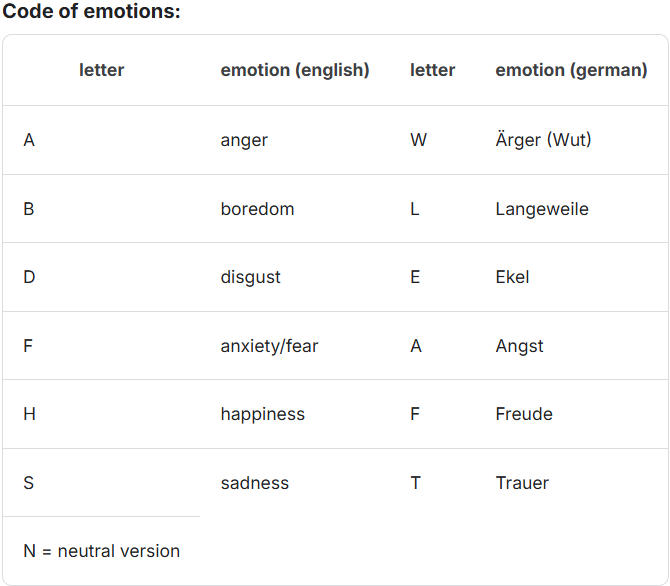

These audio files have a sampling rate of 16kHz and an amplitude of 16 bits.

In [5]:
path = "./audio_data/emo-db"

emotion_map = {"N": "Neutral", "F": "Happy", "T": "Sad", "W": "Angry", "A": "Fearful", "E": "Disgust"} # We leave out boredom because it does not correspond to any emotion from the other datasets

actor_gender = {"03": "Male", "08": "Female", "09": "Female", "10": "Male", "11": "Male", "12": "Male", "13": "Female", "14": "Female", "15": "Male", "16": "Female"}

for file in os.listdir(path):
    emo_letter = file[5]
    if emo_letter in emotion_map.keys():
        emotion = emotion_map[emo_letter]
        sex = info[0]
        audios.loc[len(audios)] = {"Dataset": "EMO-DB", "Path": path + '/' + file, 
                                "Emotion": emotion, 
                                "Sex": actor_gender[file[:2]],
                                "Emotional_level": "XX"}
    else:
        continue

## MESD

https://www.kaggle.com/datasets/saurabhshahane/mexican-emotional-speech-database-mesd

Nomenclature pattern for human voices:
````{verbatim}
<emotion>_<type of voice>_<word corpus>_<word>
````

````{verbatim}
<emotion> Anger, Disgust, Fear, Happiness, Neutral, Sadness
<type of voice> F: female, M: male, C: child
<word corpus >	A: corpus A, B: corpus B
<utterance word > Entire word in lowercase letters
````

These files have a sampling rate 48kHz and an amplitude of 24 bits. 

In [6]:
path = "./audio_data/mesd"

emotion_map = {"Anger": "Angry", "Fear": "Fearful", "Happiness": "Happy", "Sadness": "Sad", "Neutral": "Neutral", "Disgust": "Disgust"}

actor_gender = {"F": "Female", "M": "Male"} # We will not using the child voices

for file in os.listdir(path):
    info = file.split("_")
    if info[1] != 'C':
        audios.loc[len(audios)] = {"Dataset": "MESD", "Path": path + '/' + file, 
                                    "Emotion": emotion_map[info[0]], 
                                    "Sex": actor_gender[info[1]],
                                    "Emotional_level": "XX"}
    else:
        continue

In [7]:
audios.to_csv("./audio_data/complete_metadata.csv", index_label=False)

## Summary

We extract some useful information for the data presentation.

In [8]:
audios = pd.read_csv("./audio_data/complete_metadata.csv")

In [9]:
print(audios.Dataset.value_counts())
print(audios.count())

Dataset
CREMA-D    7442
RAVDESS    1440
MESD        576
EMO-DB      454
Name: count, dtype: int64
Dataset            9912
Path               9912
Emotion            9912
Sex                9912
Emotional_level    9912
dtype: int64


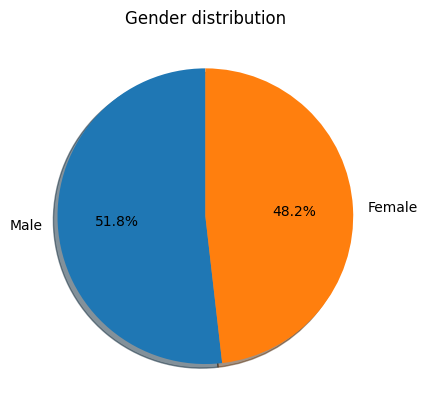

In [10]:
audios.Sex.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Gender distribution')
plt.ylabel('')
plt.show()

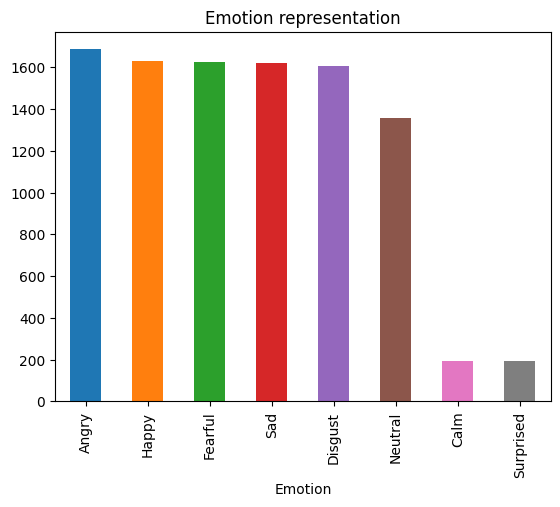

In [11]:
counts = audios.Emotion.value_counts()
colors = plt.cm.tab10.colors
color_list = colors[:len(counts)]

counts.plot.bar(color=color_list)

plt.title('Emotion representation')
plt.show()

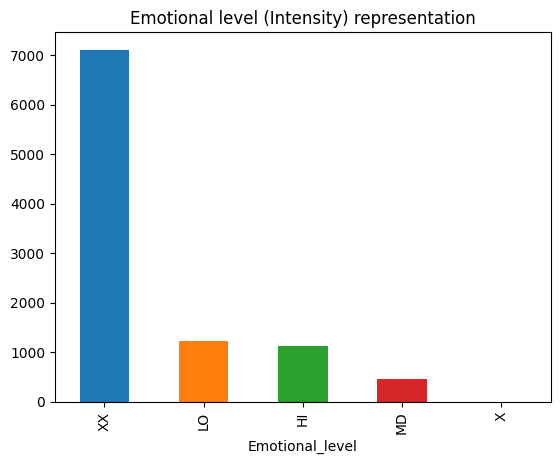

In [ ]:
counts = audios.Emotional_level.value_counts()


colors = plt.cm.tab10.colors  
color_list = colors[:len(counts)]  

counts.plot.bar(color=color_list)

plt.title('Emotional level (Intensity) representation')
plt.show()